In [1]:
# library import
import pandas as pd

Data bisa diambil dari kaggle. Atau https://drive.google.com/file/d/1uTyOEhEubdbhdRLfIH0FJiO3_aimxexj/view?usp=share_link
dan https://drive.google.com/file/d/1Bl0gsuj41Hhhe1aPrLYoMgRr4U6lHR6n/view?usp=share_link


In [2]:
from google.colab import drive
drive.mount('/content/drive')
tweets_biden = pd.read_csv('./drive/MyDrive/NLP2023/hashtag_joebiden.csv', lineterminator='\n', parse_dates = True)
tweets_trump = pd.read_csv('./drive/MyDrive/NLP2023/hashtag_donaldtrump.csv', lineterminator='\n', parse_dates = True)

Mounted at /content/drive


Mengubah United states menjadi united states of amerika

In [3]:
# Ameryka to Ameryka
tweets_biden['country'].replace({'United States':'United States of America'}, inplace = True)
tweets_trump['country'].replace({'United States':'United States of America'}, inplace = True)

In [4]:
tweets_biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [5]:
print('Total number of records in Trump dataset: ', tweets_trump.shape)
print('Total number of records in Biden dataset: ', tweets_biden.shape)

trump_initial_count = tweets_trump.shape[0]
biden_initial_count = tweets_biden.shape[0]

Total number of records in Trump dataset:  (970919, 21)
Total number of records in Biden dataset:  (776886, 21)


EDA = Exploratory Data Analysis

In [6]:
# library import
import matplotlib.pyplot as plt # basic data visualization

Kita intip brapa banyak Null Values

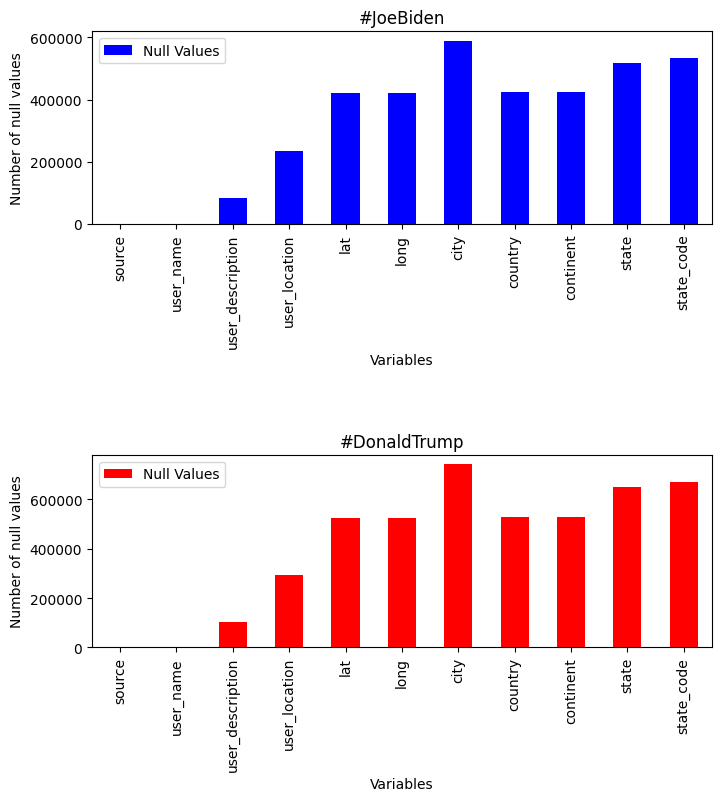

In [7]:
na_biden = pd.DataFrame( {'Null Values': tweets_biden.isna().sum()})
na_biden = na_biden.loc[ na_biden ['Null Values'] > 0]

na_trump = pd.DataFrame( {'Null Values': tweets_trump.isna().sum()})
na_trump = na_trump.loc[ na_trump ['Null Values'] > 0]

# bar plot about null values in datasets
fig, ax = plt.subplots(2, 1,
                       figsize = (8, 8),
                       gridspec_kw = {'hspace': 1.2})

na_biden.plot.bar(color = 'blue', ax = ax[0])
ax[0].set_title('#JoeBiden')
ax[0].set_xticklabels(ax[0].get_xticklabels(),
                      rotation = 90)
ax[0].set_ylabel('Number of null values')
ax[0].set_xlabel('Variables')

na_trump.plot.bar(color = 'red', ax = ax[1])
ax[1].set_title('#DonaldTrump')
ax[1].set_xticklabels(ax[1].get_xticklabels(),
                      rotation = 90)
ax[1].set_ylabel('Number of null values')
ax[1].set_xlabel('Variables')


plt.show()


Kode nya beda tapi fungsi sama = plotting null values

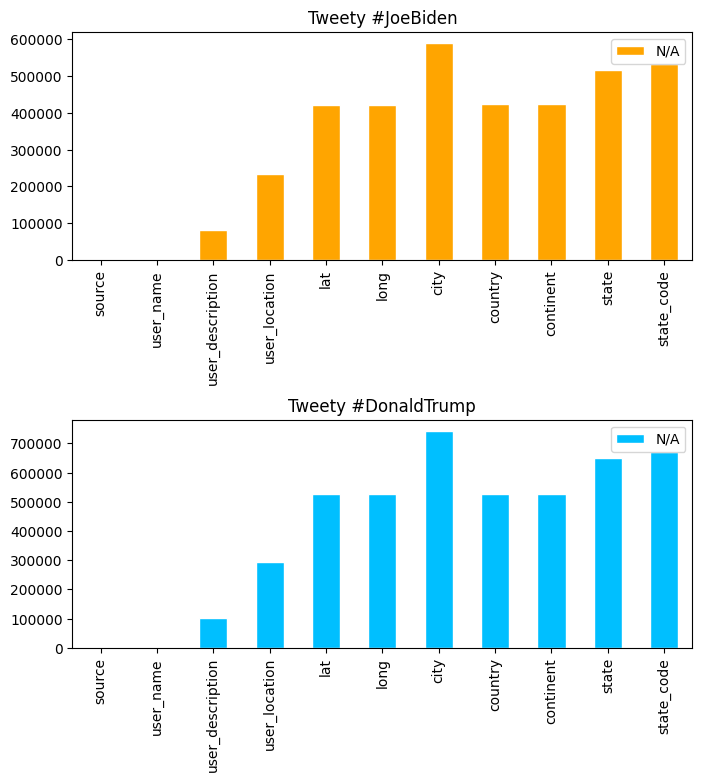

In [8]:
# missing data
na_vals_b=pd.DataFrame({'N/A':tweets_biden.isna().sum()})
na_vals_b=na_vals_b.loc[na_vals_b['N/A'] > 0]
na_vals_t=pd.DataFrame({'N/A':tweets_trump.isna().sum()})
na_vals_t=na_vals_t.loc[na_vals_t['N/A'] > 0]

# plot bar
barcolors = ['olivedrap','mediumslateblue','lightpink','orange','lightcoral','palegreen','deepskyblue','Grey']
barstyle = {"edgecolor":"white", "linewidth":1}
fig, ax=plt.subplots(2,1, figsize=(8,8), gridspec_kw={'hspace':0.7})

na_vals_b.plot.bar(color=barcolors[3], **barstyle, ax=ax[0])
ax[0].set_title('Tweety #JoeBiden')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

na_vals_t.plot.bar(color=barcolors[6], **barstyle, ax=ax[1])
ax[1].set_title('Tweety #DonaldTrump')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

Kita pengin mapping pengguna tweeter. Jadi kita gabungkan tweet biden + tweet trump

In [9]:
# merging data for heatmap
source_df=pd.concat([tweets_biden[['source','tweet','country']].copy(),tweets_trump[['source','tweet','country']].copy()])
source_df['country'].replace({'United States of America':'United States'}, inplace=True)
source_df=source_df.fillna('Geo Data NA')
source_df=source_df.drop_duplicates()

sources=pd.DataFrame(source_df.groupby(['source'])['tweet'].count().sort_values(ascending=False)[:6])
sources=sources.reset_index()
sourceslst=sources.source.to_list()

#region
country=pd.DataFrame(source_df.groupby(['country'])['tweet'].count().sort_values(ascending=False)[:6])
country=country.reset_index()
countrylst=country.country.to_list()

platXtab=pd.DataFrame(source_df.groupby(['source','country'])['tweet'].count().unstack().fillna(0))

Untuk plot berikutnya kita menggunakan seaborn. Seaborn populer plotting tools setelah matplotlib

In [10]:
# function for helping visualization and plotting
import seaborn as sns
import matplotlib.cm as cm
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap= cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

#formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

#formatterK2 = FuncFormatter(thousands2)

<ipython-input-10-a21675124e3c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap= cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)


Codingan untuk plotting

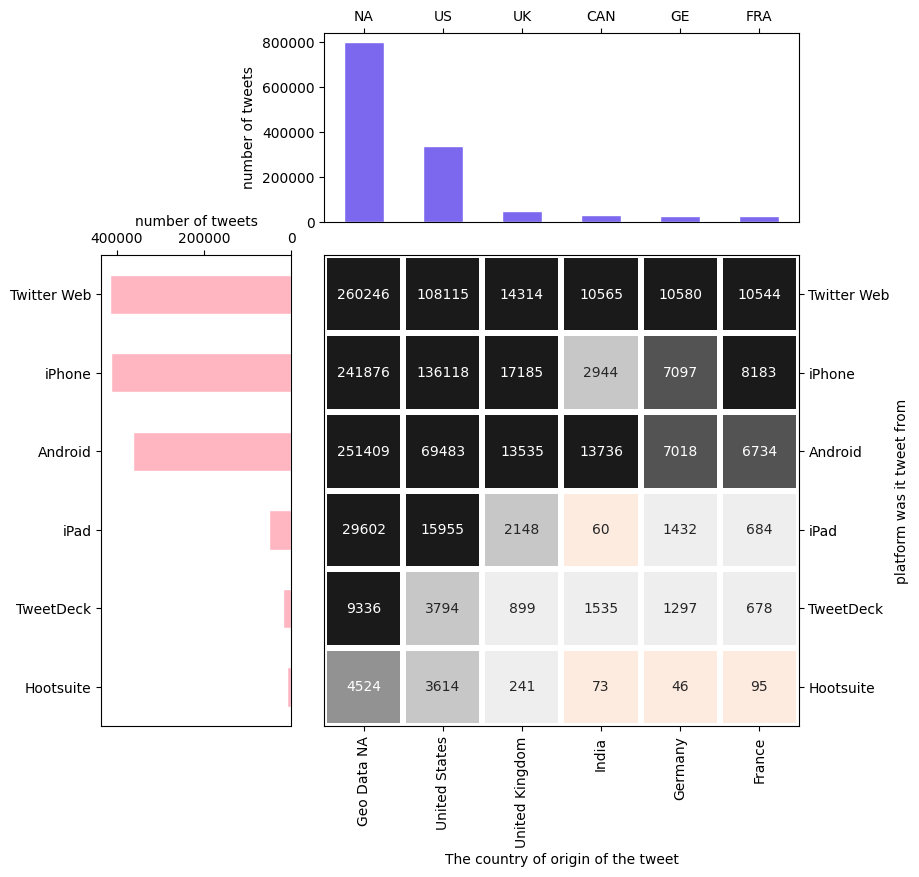

In [11]:
# HEATMAP
fig, ax=plt.subplots(2,2, figsize=(9,9),
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap1(platXtab.loc[sourceslst,countrylst], hm_ax)
hm_ax.set_xlabel('The country of origin of the tweet')
hm_ax.set_ylabel('platform was it tweet from')
hm_ax.set_yticklabels(('Twitter Web','iPhone','Android','iPad','TweetDeck','Hootsuite'), rotation=0)

bar_ax = ax[0,1]
platXtab.loc[sourceslst,countrylst].sum().plot.bar(ax=bar_ax, color=barcolors[1],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
#bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_xticklabels(('NA', 'US', 'UK', 'CAN', 'GE','FRA'), rotation=0)
bar_ax.set_xlabel('')
bar_ax.set_ylabel('number of tweets')

barh_ax = ax[1,0]
platXtab.loc[sourceslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[2],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
#barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_yticklabels(('Hootsuite','TweetDeck','iPad','Android','iPhone','Twitter Web'), rotation=0)
barh_ax.set_xlabel('number of tweets')
barh_ax.set_ylabel('')
plt.show()

Plotting pengguna twitter di peta asli. Menggunakan tools bernama "geopandas"

In [12]:
# preparation for data mapping
!pip install geopandas
import geopandas as gpd
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
from shapely.geometry import Point, Polygon
crs = {'init': 'EPSG:4326'}

tmp=pd.concat([tweets_biden[['lat','long']].copy(),tweets_trump[['lat','long']].copy()])
tmp=tmp.dropna()
geometry = [Point(xy) for xy in zip(tmp['long'],tmp['lat'])]
geo_df=gpd.GeoDataFrame(tmp, crs=crs, geometry = geometry)

<ipython-input-12-47c0195cb38d>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Plot geopandas

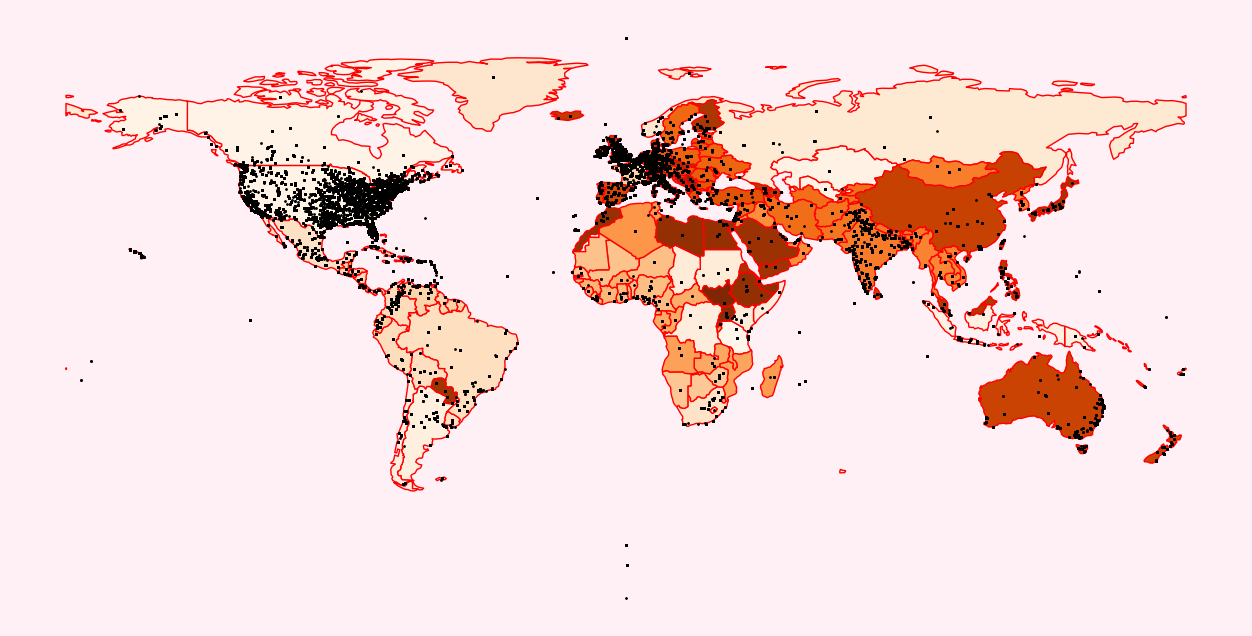

In [13]:
# map
fig, ax = plt.subplots(1,figsize=(16,8), facecolor='lavenderblush')
world = world[world.name != "Antarctica"]
world.plot(ax=ax, cmap='Oranges', edgecolors='red')
geo_df.plot(ax=ax, markersize=1, color='black', marker='o')
ax.axis('off')
plt.show()

Analisis Waktu

In [14]:
# changing the variable type to datetime object
tweets_biden['user_join_date']=pd.to_datetime(tweets_biden['user_join_date'])
tweets_trump['user_join_date']=pd.to_datetime(tweets_trump['user_join_date'])
tweets_biden['collected_at']=pd.to_datetime(tweets_biden['collected_at'])
tweets_trump['collected_at']=pd.to_datetime(tweets_trump['collected_at'])
tweets_biden['created_at']=pd.to_datetime(tweets_biden['created_at'])
tweets_trump['created_at']=pd.to_datetime(tweets_trump['created_at'])

# creating an additional time feature
tweets_biden['created_at_r']=tweets_biden['created_at'].dt.strftime('%Y-%m-%d %H')
tweets_trump['created_at_r']=tweets_trump['created_at'].dt.strftime('%Y-%m-%d %H')
tweets_biden['created_at_r2']=tweets_biden['created_at'].dt.strftime('%m-%d')
tweets_trump['created_at_r2']=tweets_trump['created_at'].dt.strftime('%m-%d')

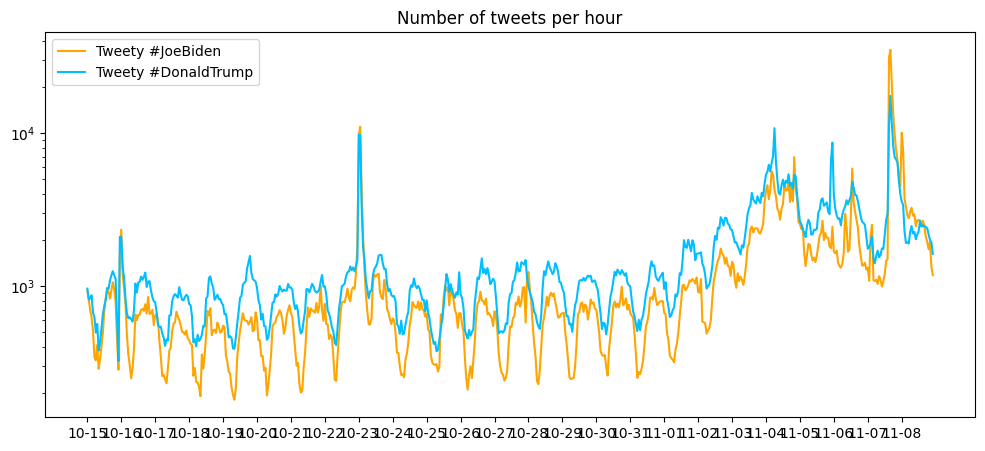

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming common_ids and common_creat are correctly computed

# Data preparation
common_b = tweets_biden[tweets_biden.user_id.isin(common_ids)].copy()
common_t = tweets_trump[tweets_trump.user_id.isin(common_ids)].copy()

common_df = pd.concat([common_b, common_t])
common_df = common_df.drop_duplicates()

cnt_tbiden = tweets_biden[tweets_biden.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()
cnt_ttrump = tweets_trump[tweets_trump.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()

# Time series plotting
plt.figure(figsize=(12, 5))
p6 = sns.lineplot(x=cnt_tbiden.index, y=cnt_tbiden.values, color=barcolors[3], label='Tweety #JoeBiden')
p6 = sns.lineplot(x=cnt_ttrump.index, y=cnt_ttrump.values, color=barcolors[6], label='Tweety #DonaldTrump')
p6.set_title('Number of tweets per hour')
p6.set_xticks(range(0, len(cnt_tbiden.index), 24))
p6.set_xticklabels(common_df['created_at'].dt.strftime('%m-%d').unique().tolist())
p6.set_yscale('log')
plt.legend()  # Add a legend to differentiate between the lines
plt.show()


Untuk analisis berikutnya, kita hanya menganalisis yang dari Amerika

In [17]:
# we leave tweets, coming only from the United States
tweets_biden = tweets_biden.loc[tweets_biden['country'] == 'United States of America'][:]
tweets_trump = tweets_trump.loc[tweets_trump['country'] == 'United States of America'][:]

In [18]:
print('tweets USA o Trump: ', tweets_trump.shape)
print('tweets USA o Biden: ', tweets_biden.shape)

tweets USA o Trump:  (213263, 23)
tweets USA o Biden:  (181137, 23)


Filter duplicate

In [19]:
#number of duplicate tweets in both sets
tids = tweets_trump.tweet_id
bids = tweets_biden.tweet_id

ids_tweets_in_common = set(tweets_trump.tweet_id).intersection(set(tweets_biden.tweet_id))
len(ids_tweets_in_common)

37364

In [20]:
# See the duplicates
pd.options.display.max_colwidth = 1000

tweets_biden.tweet.loc[tweets_biden.tweet_id.isin(list(ids_tweets_in_common))].head(5)

0     #Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi
6                      In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?
17                                               Comments on this? "Do Democrats Understand how Ruthless China is?" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ
27                                                                                                                                   

Kita hanya menganalisis tweet yang unik baik bidden maupun trump (filter duplicate)

In [21]:
unique_trump = tweets_trump[~tweets_trump['tweet_id'].isin(ids_tweets_in_common)]
unique_biden = tweets_biden[~tweets_biden['tweet_id'].isin(ids_tweets_in_common)]

In [22]:
print('Total number of unique records in Trump USA dataset: ', unique_trump.shape)
print('Total number of unique records in Biden USA dataset: ', unique_biden.shape)

Total number of unique records in Trump USA dataset:  (175843, 23)
Total number of unique records in Biden USA dataset:  (143699, 23)


Kita bahkan bisa mendeteksi bahasa apa yang dipakai pengguna tweeter. Hanya untuk running agak lama (saya coba masing2 20 menit) jadi saya skip

In [23]:
!pip install langdetect
import langdetect
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def get_language(tweet):
    try:
        lang=detect(tweet)
    except:
        lang='no'
        print("This tweet throws an error:", tweet)
    return lang

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=02a50d6d3f3d100602359593f4741fff8e8cb220a7ea4a69c12c235e85c45316
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [24]:
import time
start_time = time.time()

unique_trump['lang'] = unique_trump.tweet.apply(lambda x: get_language(x))

stop_time = time.time()
print(f'Trump took {np.around((time.time() - start_time), decimals=1)} seconds')

This tweet throws an error: ⁣
⁣
𝘋𝘰 𝘯𝘰𝘵 𝘷𝘰𝘵𝘦 𝘧𝘰𝘳 #𝘊𝘰𝘷𝘪𝘥𝘪𝘰𝘵𝘐𝘯𝘊𝘩𝘪𝘦𝘧 𝘰𝘳 𝘵𝘩𝘦 #𝘔𝘢𝘴𝘬𝘭𝘦𝘴𝘴𝘋𝘶𝘮𝘣𝘈𝘴𝘴⁣
⁣
𝘕𝘰 𝘮𝘰𝘳𝘦 #𝘛𝘙𝘜𝘔𝘗
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
#Trump https://t.co/KFJ67siWc5
This tweet throws an error: #Trump ⬇️
               ⬇️ 
               ⬇️
               ⬇️
               ⬇️
   ♨️♨️♨️♨️♨️♨️ https://t.co/qQIcwH4aO4
This tweet throws an error: 🎶🎶🎶🎶🎶#TRUMP!🎶🎶🎶🎶🎶 🕺💃😊🇺🇸💫🙏❤️🤍💙 https://t.co/JoVeYtWWmd
This tweet throws an error: #trump #Trump2020 #Trump2020Landslide #RedWave2020 #KAG2020 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️ https://t.co/ZjNIKAhMOK
This tweet throws an error: @LeslieASpurlock @chainsofpace 💟💟💟♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
💟💟💟        Vote #Trump To Save America
💟💟💟♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
💟💟💟               #maga2020 #KAG2020 
♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️

♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
This tweet throw

<ipython-input-24-20b6c3a0b457>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_trump['lang'] = unique_trump.tweet.apply(lambda x: get_language(x))


In [25]:
start_time = time.time()

unique_biden['lang'] = unique_biden.tweet.apply(lambda x: get_language(x))

stop_time = time.time()
print(f'It took {np.around((time.time() - start_time), decimals=1)} seconds')

This tweet throws an error: 👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻#JoeBiden https://t.co/9lnd35iOfq
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸

Is #JoeBiden a racist? 

🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
This tweet throws an error: Two words..
┏━━┓┏━━┓┏━━┓┏━━┓
┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃
┏━┛┃┃┃┃┃┏━┛┃┃┃┃┃
   🇺🇸🇺🇸@RealDonaldTrump 🇺🇸🇺🇸
┃┏━┛┃┃┃┃┃┏━┛┃┃┃┃
┃┗━┓┃┗┛┃┃┗━┓┃┗┛┃
┗━━┛┗━━┛┗━━┛┗━━┛

#HunterBiden #JoeBiden 👉🇨🇳 https://t.co/LrOcj8ni78
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#Biden https://t.co/9CvcaErqN6
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#joebiden https://t.co/hPFsbGIGQB
This tweet throws an error: 👇🏻✌🏻💙👏🏻👏🏻👏🏻#Biden https://t.co/1YSntdNP1I
This tweet throws an error: #biden 👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼 https://t.co/YtQTbue3Ez
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸#BIDEN https://t.co/njfvCATvn6
This tweet throws an error: #BIDEN ⤵️👇👇👇👇👇👇👇👇👇👇⤵️⤵️⤵️⤵️⤵️⤵️⤵️ https://t.co/wNlRUsqkWB https://t.co/xQejP5xO1S
This tweet throws an error: 𝗟𝗜𝗦𝗧𝗘𝗡𝗜𝗡𝗚 𝗧𝗢 𝗧𝗛𝗘 𝗦𝗖𝗜𝗘𝗡𝗧𝗜𝗦𝗧 ..

<ipython-input-25-4c6e9472e649>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_biden['lang'] = unique_biden.tweet.apply(lambda x: get_language(x))


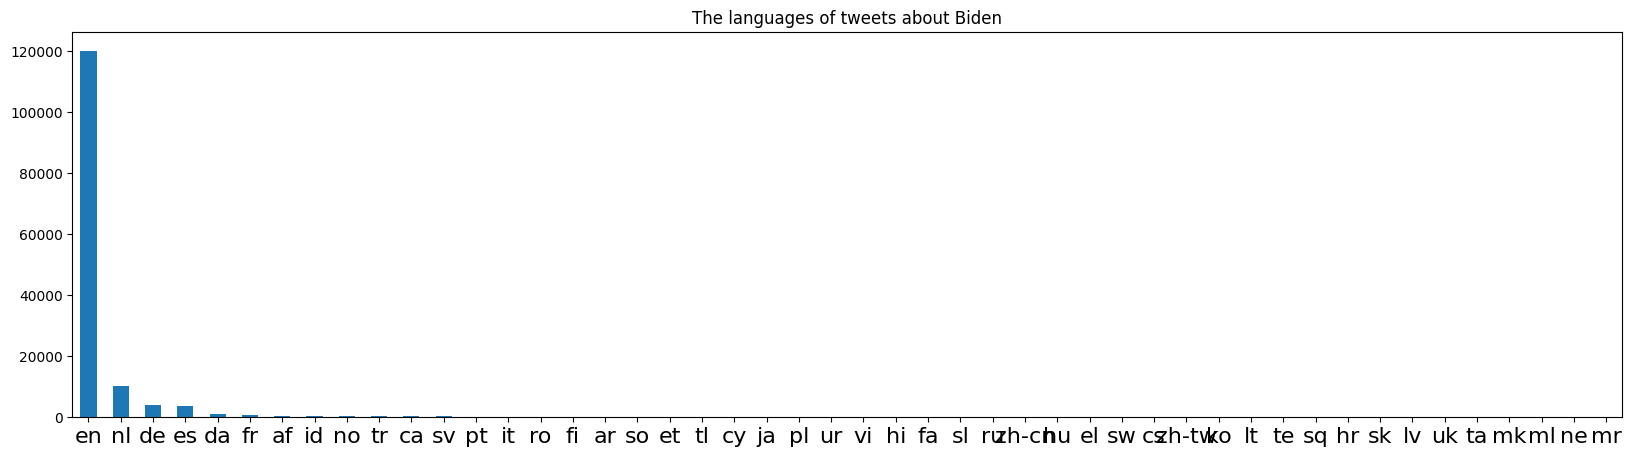

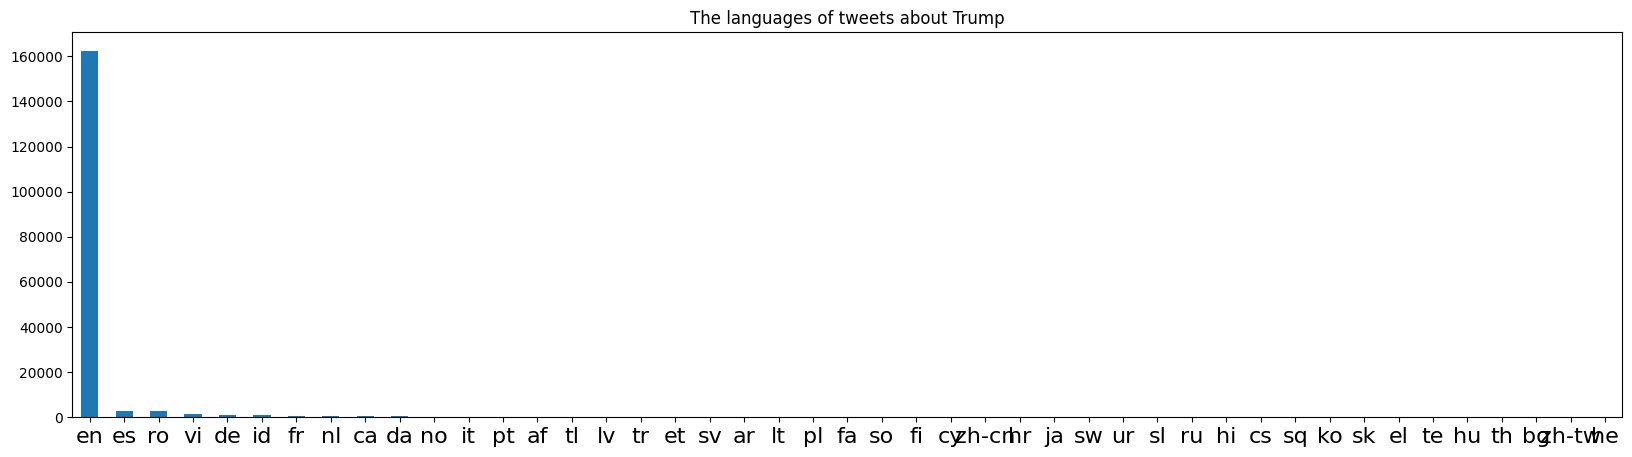

In [26]:
plt.figure(figsize=(20,5))
ax = unique_biden.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('The languages of tweets about Biden')
plt.show()

plt.figure(figsize=(20,5))
ax = unique_trump.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('The languages of tweets about Trump')
plt.show()

In [27]:
tweets_en_biden = unique_biden[unique_biden.lang == 'en']
tweets_en_trump = unique_trump[unique_trump.lang == 'en']

In [28]:
print('Trump: ', tweets_en_trump.shape)
print('Biden: ', tweets_en_biden.shape)

Trump:  (162550, 24)
Biden:  (120262, 24)


Sekarang saya filter yang hanya menggunakan bahasa Inggris

In [29]:
tweets_en_biden.to_csv('tweets_en_biden.csv')
tweets_en_trump.to_csv('tweets_en_trump.csv')

In [30]:
tweets_en_biden = pd.read_csv('./drive/MyDrive/NLP2023/tweets_en_biden.csv', lineterminator='\n', parse_dates = True)
tweets_en_trump = pd.read_csv('./drive/MyDrive/NLP2023/tweets_en_trump.csv', lineterminator='\n', parse_dates = True)

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Cleaning punctuation

In [32]:
def remove_punct (text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

tweets_en_biden['text_clean'] = tweets_en_biden['tweet'].apply(lambda x: remove_punct(x))
tweets_en_trump['text_clean'] = tweets_en_trump['tweet'].apply(lambda x: remove_punct(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him for being overweight Biden shows his low IQ daily Maybe Joe should hold town halls in kindergarten He’ll be amongst equals and no one will say anything when he takes his afternoon nap httpstcoMr2nh102nG


Tokenisasi = pecah menjadi kata-kata

In [33]:
import re
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

tweets_en_biden['text_tokenized'] = tweets_en_biden['text_clean'].apply(lambda x: tokenize(x.lower()))
tweets_en_trump['text_tokenized'] = tweets_en_trump['text_clean'].apply(lambda x: tokenize(x.lower()))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip,"[islandgirlprv, bradbeauregardj, meidastouch, this, is, how, biden, made, his, trumpisnotamerica, httpstcoubqafu86ip]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl,"[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption, httpstcoc6clrtshql]"
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz,"[in, an, effort, to, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, to, share, the, link, to, a, nypost, article, about, hunter, biden, this, is, what, popped, up, nypost, hunterbiden, biden, election2020, httpstcoyyimdzrokz]"
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU,"[twitter, is, doing, everything, they, can, to, help, democrats, win, the, election, making, sure, nobody, sees, a, negative, story, about, biden, only, negative, stories, on, trump, twittercensorship, biden, ukraine, hunterbiden, httpstcodblkqbmvru]"
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him for being overweight Biden shows his low IQ daily Maybe Joe should hold town halls in kindergarten He’ll be amongst equals and no one will say anything when he takes his afternoon nap httpstcoMr2nh102nG,"[joebiden, calls, him, a, lier, and, then, insults, him, for, being, overweight, biden, shows, his, low, iq, daily, maybe, joe, should, hold, town, halls, in, kindergar

Filter yang terlalu pendek atau terlalu panjang

In [34]:
def short_long(text):
  text = [word for word in text if (len(word)>2 and len(word)<12)]
  return text


tweets_en_biden['no_long_short'] = tweets_en_biden['text_tokenized'].apply(lambda x: short_long(x))
tweets_en_trump['no_long_short'] = tweets_en_trump['text_tokenized'].apply(lambda x: short_long(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip,"[islandgirlprv, bradbeauregardj, meidastouch, this, is, how, biden, made, his, trumpisnotamerica, httpstcoubqafu86ip]","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl,"[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption, httpstcoc6clrtshql]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]"
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz,"[in, an, effort, to, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, to, share, the, link, to, a, nypost, article, about, hunter, biden, this, is, what, popped, up, nypost, hunterbiden, biden, election2020, httpstcoyyimdzrokz]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]"
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU,"[twitter, is, doing, everything, they, can, to, help, democrats, win, the, election, making, sure, nobody, sees, a, negative, story, about, biden, only, negative, stories, on, trump, twittercensorship, biden, ukraine, hunterbiden, httpstcodblkqbmvru]","[twitter, doing, everything, they, can, help, democrats, win, the, election, making, sure, nobody, sees, negative, story, about, biden, only, negative, stories, trump, biden, ukraine, hunterbiden]"
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and

Cleaning: Buang link atau buang yang mengandung http

In [35]:
# remove string with 'http'
def remove_http(text):
  text = [word for word in text if not word.startswith('http')]
  return text


tweets_en_biden['no_http'] = tweets_en_biden['no_long_short'].apply(lambda x: remove_http(x))
tweets_en_trump['no_http'] = tweets_en_trump['no_long_short'].apply(lambda x: remove_http(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip,"[islandgirlprv, bradbeauregardj, meidastouch, this, is, how, biden, made, his, trumpisnotamerica, httpstcoubqafu86ip]","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl,"[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption, httpstcoc6clrtshql]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]"
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz,"[in, an, effort, to, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, to, share, the, link, to, a, nypost, article, about, hunter, biden, this, is, what, popped, up, nypost, hunterbiden, biden, election2020, httpstcoyyimdzrokz]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]"
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU,"[twitter, is, doing, everything, they, can, to, help, democrats, win, the, election, making, sure, nobody, sees, a, negative, story, about, biden, only, negative, stories, on, trump, twittercensorship, biden, ukraine, hunterbiden, httpstcodblkqbmvru]","[twitter, doing, everything, they, can, help, democrats, win, the, election, making, sure, nobody, sees, negative, story, about, biden, only, negative, stories, trump, biden, ukraine, hunterbiden]","[twitter, doing, everything, they, can, help, democrats, win, the, election, making, sure, nobody, sees, negative, story, about, biden, only, negative, stories, trump, biden, ukraine, hunterbiden]"
4,23,2020-10-15 00:01:

Cleanin stopwords

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords (tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

tweets_en_biden['text_nostop'] = tweets_en_biden['no_http'].apply(lambda x: remove_stopwords(x))
tweets_en_trump['text_nostop'] = tweets_en_trump['no_http'].apply(lambda x: remove_stopwords(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip,"[islandgirlprv, bradbeauregardj, meidastouch, this, is, how, biden, made, his, trumpisnotamerica, httpstcoubqafu86ip]","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl,"[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption, httpstcoc6clrtshql]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]"
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz,"[in, an, effort, to, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, to, share, the, link, to, a, nypost, article, about, hunter, biden, this, is, what, popped, up, nypost, hunterbiden, biden, election2020, httpstcoyyimdzrokz]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]","[effort, find, truth, allegations, twitter, isnt, allowing, people, share, link, nypost, article, hunter, biden, popped, nypost, hunterbiden, biden]"
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU,"[twitter, is, doing, everything, they, can, to, help, democrats, win, the, election, making, sure, nobody, sees, a, negative, story, about, biden, only, negative, stories, on, trump, twittercensorship, biden, ukraine, hunterbiden, httpstcodblkqbmvru]","[twitter, doing, everything, they, can, help, democrats, win, the, election, making, sure, nobody, sees, negative, story, about, biden, only, negative, stories, trump, biden, ukraine, hunterbiden]","[

Lemmatisasi: Lemmatisasi mirip dengan tokenisasi tapi lebih canggih.
better -> good


In [38]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing (text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets_en_biden['text_lemmatized'] = tweets_en_biden['text_nostop'].apply(lambda x: lemmatizing(x))
tweets_en_trump['text_lemmatized'] = tweets_en_trump['text_nostop'].apply(lambda x: lemmatizing(x))

tweets_en_biden.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop,text_lemmatized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip,"[islandgirlprv, bradbeauregardj, meidastouch, this, is, how, biden, made, his, trumpisnotamerica, httpstcoubqafu86ip]","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl,"[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption, httpstcoc6clrtshql]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]","[censorship, hunterbiden, biden, bidenemails, bidenemail, corruption]"
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz,"[in, an, effort, to, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, to, share, the, link, to, a, nypost, article, about, hunter, biden, this, is, what, popped, up, nypost, hunterbiden, biden, election2020, httpstcoyyimdzrokz]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]","[effort, find, the, truth, about, allegations, that, twitter, isnt, allowing, people, share, the, link, nypost, article, about, hunter, biden, this, what, popped, nypost, hunterbiden, biden]","[effort, find, truth, allegations, twitter, isnt, allowing, people, share, link, nypost, article, hunter, biden, popped, nypost, hunterbiden, biden]","[effort, find, truth, allegation, twitter, isnt, allowing, people, share, link, nypost, article, hunter, biden, popped, nypost, hunterbiden, biden]"
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU,"[twitter, is, doing, everything, they, can, to, help, democrats, win, the, election, making, sure, nobody, sees, a, negative, story, about, biden, only, negative, stories, on, trump, twittercensorship, biden, 

Simpan di lokal. Akan hilang ketika disconnected

In [39]:
tweets_en_biden.to_csv('tweets_en_biden_lemm.csv')
tweets_en_trump.to_csv('tweets_en_trump_lemm.csv')

In [40]:
tweets_en_biden = pd.read_csv('tweets_en_biden_lemm.csv', lineterminator='\n', parse_dates=True)
tweets_en_trump = pd.read_csv('tweets_en_trump_lemm.csv', lineterminator='\n', parse_dates=True)

In [41]:
biden = tweets_en_biden.loc[tweets_en_biden['country'] == 'United States of America']['text_lemmatized']
trump = tweets_en_trump.loc[tweets_en_trump['country'] == 'United States of America']['text_lemmatized']

In [42]:
biden


0                                                                                                                                                                                ['meidastouch', 'biden', 'made']
1                                                                                                                               ['censorship', 'hunterbiden', 'biden', 'bidenemails', 'bidenemail', 'corruption']
2                         ['effort', 'find', 'truth', 'allegation', 'twitter', 'isnt', 'allowing', 'people', 'share', 'link', 'nypost', 'article', 'hunter', 'biden', 'popped', 'nypost', 'hunterbiden', 'biden']
3              ['twitter', 'everything', 'help', 'democrat', 'win', 'election', 'making', 'sure', 'nobody', 'see', 'negative', 'story', 'biden', 'negative', 'story', 'trump', 'biden', 'ukraine', 'hunterbiden']
4         ['joebiden', 'call', 'lier', 'insult', 'overweight', 'biden', 'show', 'low', 'daily', 'maybe', 'joe', 'hold', 'town', 'hall', 'amongst', 'equal', 'one

Kita akan membuat wordcloud

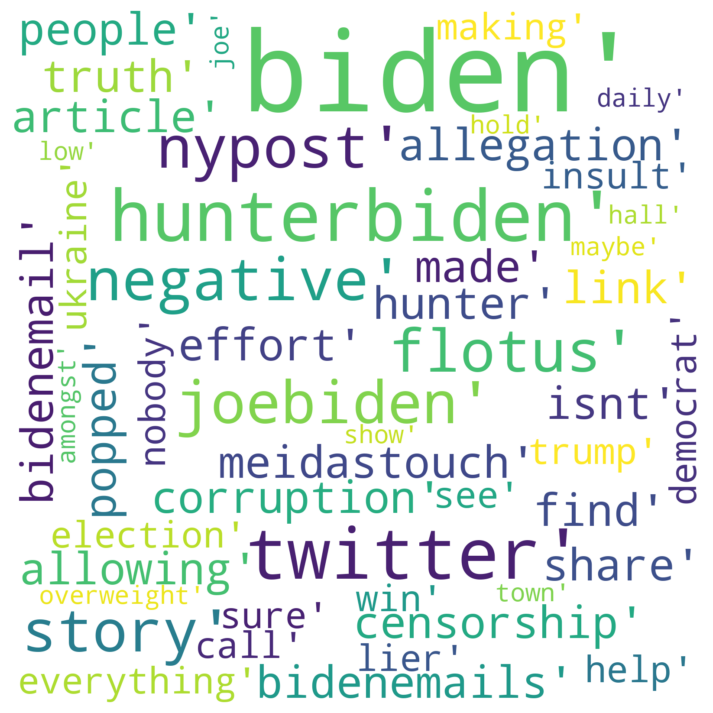

In [43]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS,
                 background_color="white", max_words=50,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(biden.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

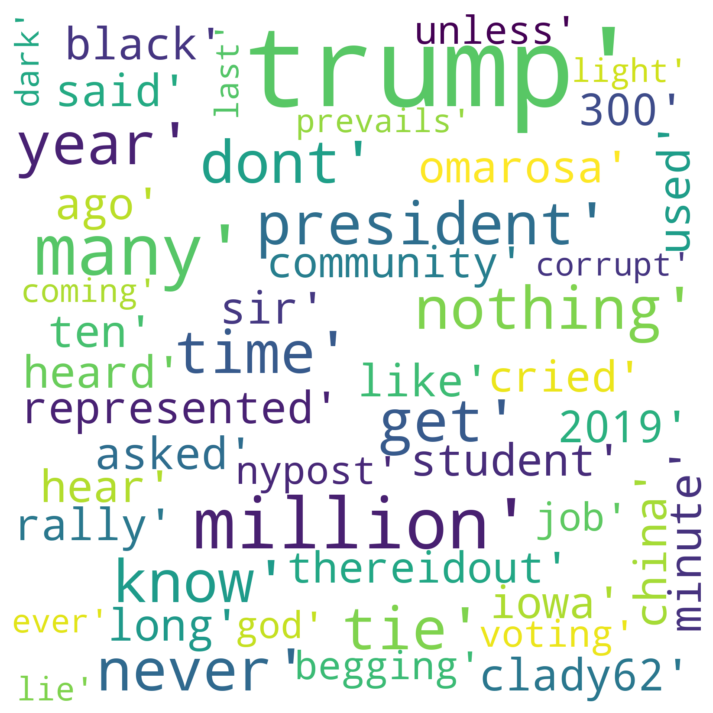

In [44]:
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS,
                 background_color="white", max_words=50,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(trump.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

In [45]:
text_biden = tweets_en_biden['text_clean']
text_trump = tweets_en_trump['text_clean']

In [46]:
import unicodedata
def clean1(sent):
    filtered_sent=""
    stopwords = nltk.corpus.stopwords.words('english')
    sent = (unicodedata.normalize('NFKD', sent)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    sent = re.sub(r'#.+|https.+|[^(a-zA-Z)\s]','',sent)
    words=sent.split()
    for word in words:
        if word not in stopwords:
            filtered_sent=filtered_sent+' '+word
    return filtered_sent

def clean2(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

words_biden = clean2(''.join(str(text_biden.apply(clean1).tolist())))
words_trump = clean2(''.join(str(text_trump.apply(clean1).tolist())))
words_biden[:10]

['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'biden',
 'made',
 'trumpisnotamerica',
 'censorship',
 'hunterbiden',
 'biden',
 'bidenemails']

Analisis N-Gram atau lebih dari satu kata. Misalkan rumah dan sakit berbeda dengan rumah sakit

In [47]:
words_biden2, words_trump2 = [],[]

In [48]:
for i in words_biden:
  if i != 'trump' and i!='donald':
    if i!= 'biden' and i != 'joe':
      if i != 'joebiden' and i != 'donaldtrump':
        if i != 'election' and i != 'vote':
          if i != 'u' and i != 'win':
            if i != 'like' and i!= 'amp':
              words_biden2.append(i)

for i in words_trump:
  if i != 'trump' and i!='donald':
    if i!= 'biden' and i != 'joe':
      if i != 'joebiden' and i != 'donaldtrump':
        if i != 'election' and i != 'vote':
          if i != 'u' and i != 'win':
            if i != 'like' and i!= 'amp':
              words_trump2.append(i)

In [49]:
words_biden2[:20]

['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'made',
 'trumpisnotamerica',
 'censorship',
 'hunterbiden',
 'bidenemails',
 'bidenemail',
 'corruption',
 'effort',
 'find',
 'truth',
 'allegation',
 'twitter',
 'isnt',
 'allowing',
 'people',
 'share',
 'link']

In [50]:
biden_2ngrams=(pd.Series(nltk.ngrams(words_biden2, 2)).value_counts())[:10]
trump_2ngrams=(pd.Series(nltk.ngrams(words_trump2, 2)).value_counts())[:10]
biden_3ngrams=(pd.Series(nltk.ngrams(words_biden2, 3)).value_counts())[:10]
trump_3ngrams=(pd.Series(nltk.ngrams(words_trump2, 3)).value_counts())[:10]


In [51]:
biden_ngrams=pd.concat([biden_2ngrams,biden_3ngrams])
trump_ngrams=pd.concat([trump_2ngrams,trump_3ngrams])

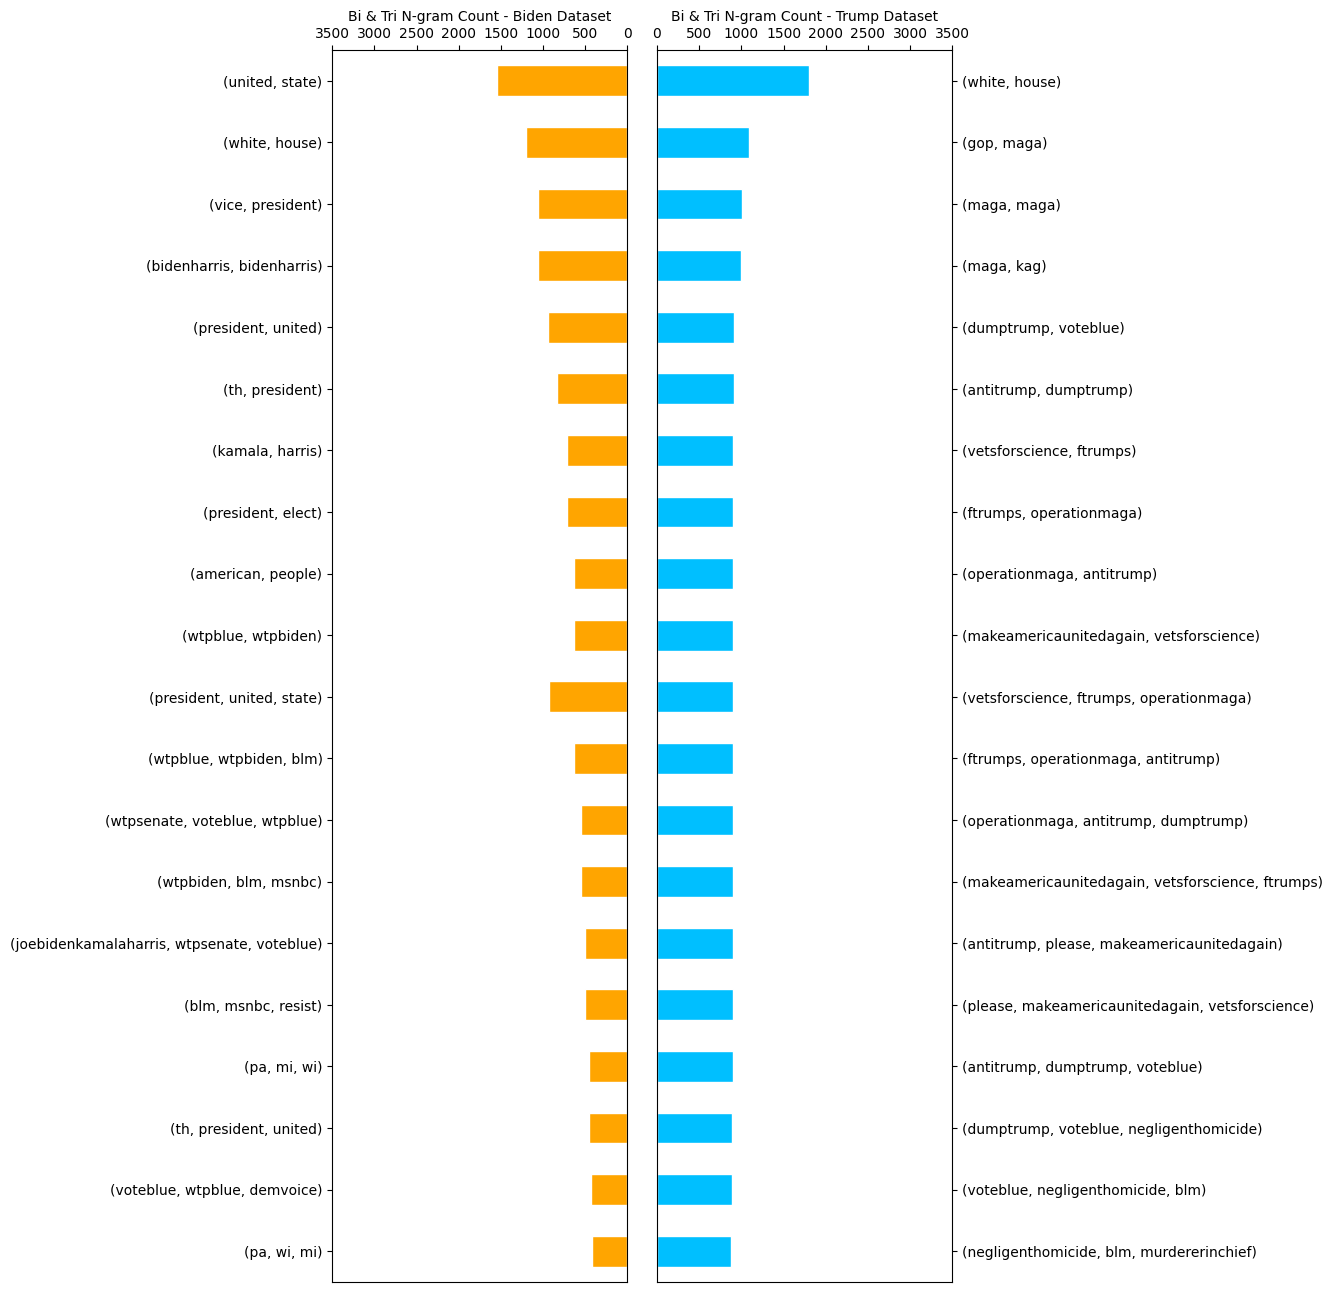

In [52]:
fig, ax=plt.subplots(1,2, figsize=(8,16),
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
biden_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
#barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Bi & Tri N-gram Count - Biden Dataset')
barh_ax.set_ylabel('')

barh_ax = ax[1]
trump_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
#barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Bi & Tri N-gram Count - Trump Dataset')
barh_ax.set_ylabel('')
plt.show()

In [53]:
biden

0                                                                                                                                                                                ['meidastouch', 'biden', 'made']
1                                                                                                                               ['censorship', 'hunterbiden', 'biden', 'bidenemails', 'bidenemail', 'corruption']
2                         ['effort', 'find', 'truth', 'allegation', 'twitter', 'isnt', 'allowing', 'people', 'share', 'link', 'nypost', 'article', 'hunter', 'biden', 'popped', 'nypost', 'hunterbiden', 'biden']
3              ['twitter', 'everything', 'help', 'democrat', 'win', 'election', 'making', 'sure', 'nobody', 'see', 'negative', 'story', 'biden', 'negative', 'story', 'trump', 'biden', 'ukraine', 'hunterbiden']
4         ['joebiden', 'call', 'lier', 'insult', 'overweight', 'biden', 'show', 'low', 'daily', 'maybe', 'joe', 'hold', 'town', 'hall', 'amongst', 'equal', 'one

Setelah kita belajar plotting wordcloud, selanjutnya ada textblob:
1. Polarity [-1,1] atau sentimen
2. Subjectivity [0,1] 0 murni opini dan 1 murni fakta

In [54]:
tweets_biden_blob = tweets_en_biden['text_clean'].to_frame()
tweets_trump_blob = tweets_en_trump['text_clean'].to_frame()

tweets_biden_blob.head()


,text_clean
0,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip
1,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl
2,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz
3,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU
4,JoeBiden calls him a lier and then insults him for being overweight Biden shows his low IQ daily Maybe Joe should hold town halls in kindergarten He’ll be amongst equals and no one will say anything when he takes his afternoon nap httpstcoMr2nh102nG


In [55]:
!pip install textblob
from textblob import TextBlob
tweets_biden_blob['polarity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_biden_blob['subjectivity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
biden_blob = tweets_biden_blob.sample(1000)

tweets_trump_blob['polarity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_trump_blob['subjectivity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
trump_blob = tweets_trump_blob.sample(1000)

trump_blob.head()

,text_clean,polarity,subjectivity
109194,Do you believe as Trump states that we always know who wins on election night Then you are a very stupid person,-0.350000,0.600000
39707,On the contrary look a the bias hatred and rudeness of Donald J Trump BidenHarris2020 Trump RealDonaldTrump httpstcosf9bFZ2hT3,0.000000,0.000000
82719,realDonaldTrump Speaking of empty words and promises where is that healthcare plan you promised Where is our second STIMULUSCHECK Where are your taxes All weve had with Trump is fear and hopelessness Both your campaigns have been fear based,-0.050000,0.250000
37897,What the hell is this guy talking about What “Main Street” is his where everything is open and things are booming His “vantage point” re what Trump has built is nonsense MSNBC,0.083333,0.416667
68878,DailyStuffMag Isnt that his daughter in this picture Cant be a relation she is 14 years old from th look of her ok maybe barely 18 he is 65 What is it with Old fogies and their money these hotties want so badly Geraldo I am looking at you cradle robber maga trump trump2020,0.010000,0.333333


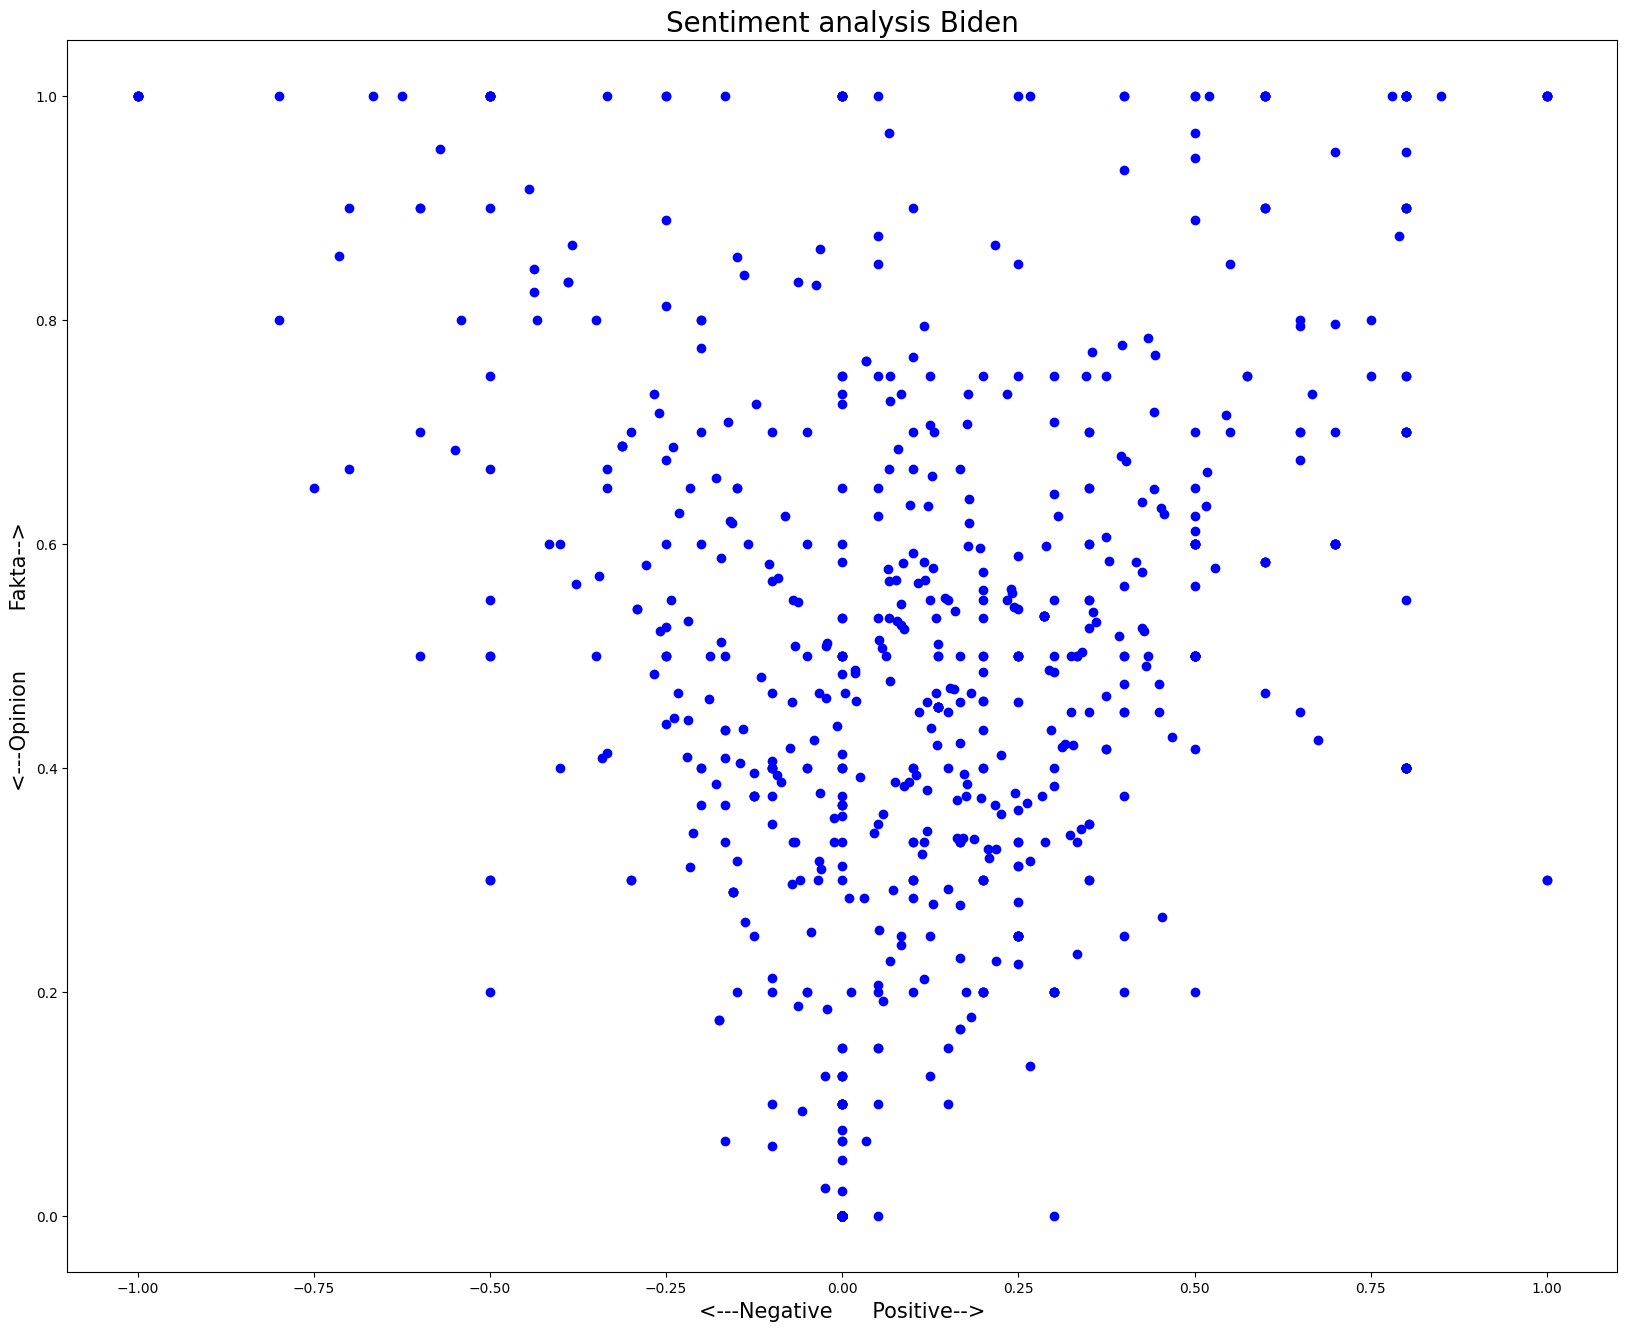

In [56]:
plt.figure(figsize=[20, 16])

for index, row in enumerate(biden_blob.index):
    x = biden_blob.polarity.loc[row]
    y = biden_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='blue')

plt.title('Sentiment analysis Biden', fontsize=20)
plt.xlabel('<---Negative      Positive-->', fontsize=15)
plt.ylabel('<---Opinion         Fakta-->', fontsize=15)

plt.show()

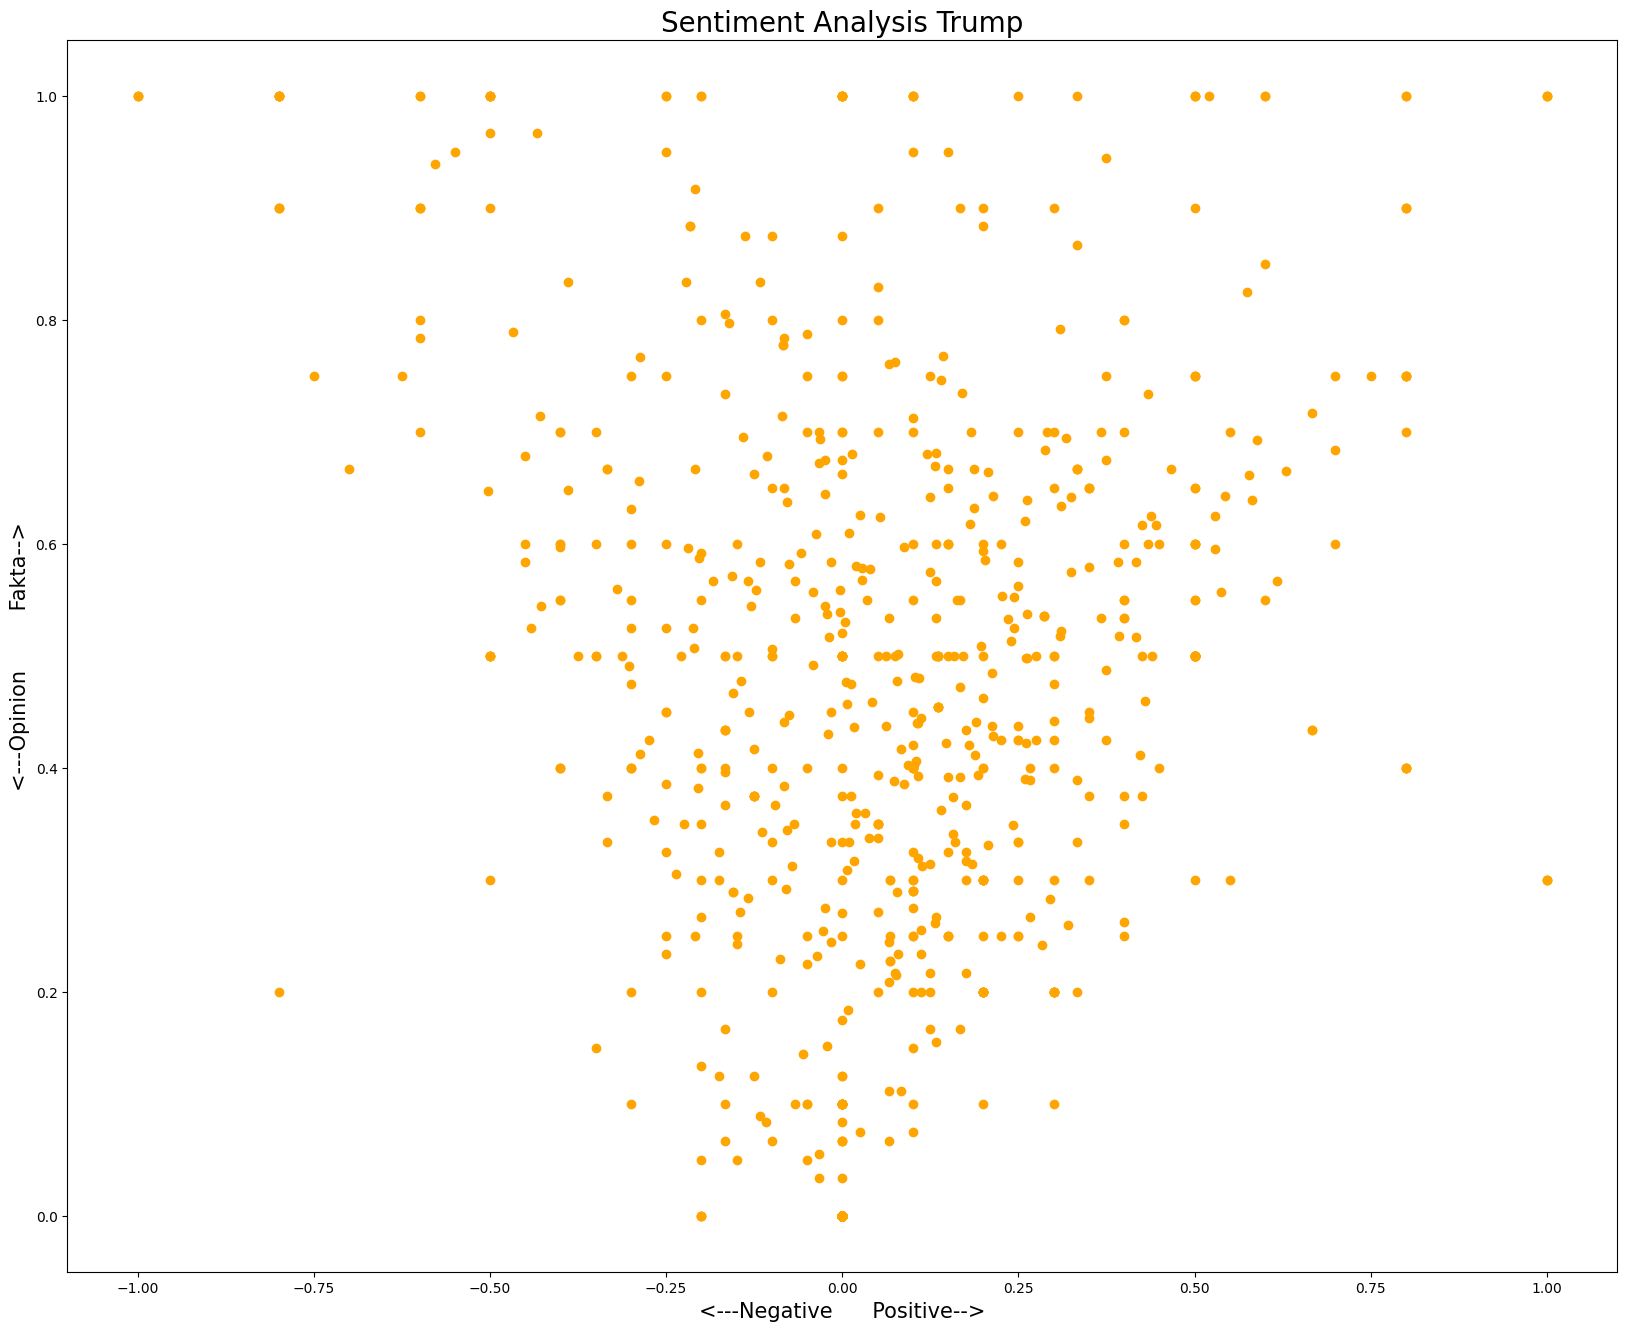

In [57]:
plt.figure(figsize=[20, 16])

for index, row in enumerate(trump_blob.index):
    x = trump_blob.polarity.loc[row]
    y = trump_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='orange')

plt.title('Sentiment Analysis Trump', fontsize=20)
plt.xlabel('<---Negative      Positive-->', fontsize=15)
plt.ylabel('<---Opinion         Fakta-->', fontsize=15)

plt.show()


<Axes: title={'center': 'Boxplot subjectivitas Biden'}>

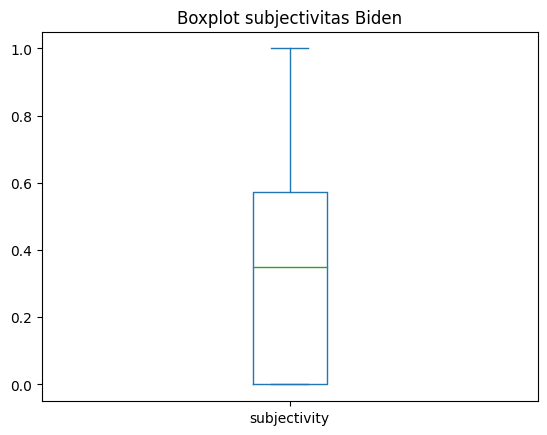

In [58]:
tweets_biden_blob.subjectivity.plot.box(title='Boxplot subjectivitas Biden')

<Axes: title={'center': 'Boxplot subjectivitas trump'}>

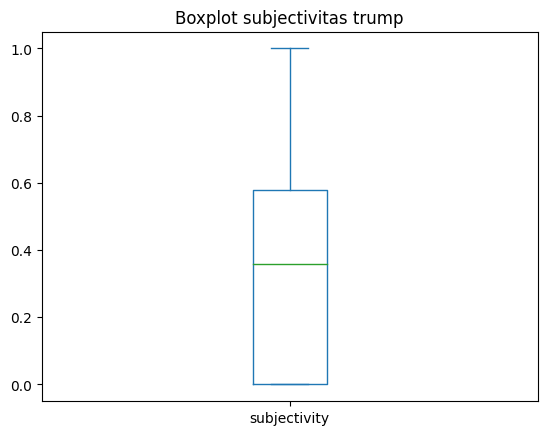

In [59]:
tweets_trump_blob.subjectivity.plot.box(title='Boxplot subjectivitas trump')


<Axes: title={'center': 'bOXPLOT Sentiment/Polarity Biden'}>

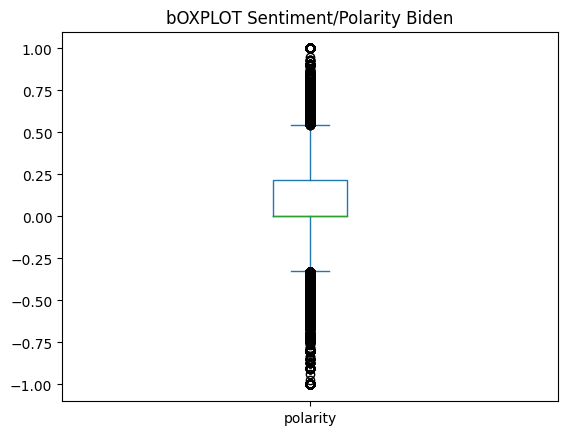

In [60]:
tweets_biden_blob.polarity.plot.box(title='bOXPLOT Sentiment/Polarity Biden')

<Axes: title={'center': 'Boxplot sentimet/polarity trump'}>

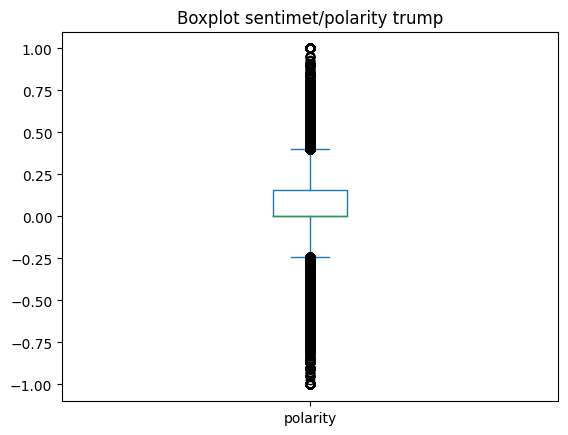

In [61]:
tweets_trump_blob.polarity.plot.box(title='Boxplot sentimet/polarity trump')

In [62]:
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [63]:
tweets_biden_blob['analysis'] = tweets_biden_blob['polarity'].apply(getAnalysis)
tweets_trump_blob['analysis'] = tweets_trump_blob['polarity'].apply(getAnalysis)
tweets_biden_blob.head()


,text_clean,polarity,subjectivity,analysis
0,IslandGirlPRV BradBeauregardJ MeidasTouch This is how Biden made his TrumpIsNotAmerica \nhttpstcouBqAFU86Ip,0.00,0.000000,neutral
1,censorship HunterBiden Biden BidenEmails BidenEmail Corruption httpstcoC6clrtshQl,0.00,0.000000,neutral
2,In an effort to find the truth about allegations that Twitter isnt allowing people to share the link to a nypost article about Hunter Biden this is what popped up NYPost HunterBiden Biden Election2020 httpstcoyYImdZrOKz,0.00,0.000000,neutral
3,Twitter is doing everything they can to help Democrats win the election Making sure nobody sees a negative story about Biden Only Negative stories on Trump TwitterCensorship Biden Ukraine HunterBiden httpstcodbLKQBMvRU,0.14,0.617778,positive
4,JoeBiden calls him a lier and then insults him for being overweight Biden shows his low IQ daily Maybe Joe should hold town halls in kindergarten He’ll be amongst equals and no one will say anything when he takes his afternoon nap httpstcoMr2nh102nG,0.00,0.150000,neutral


Text(0.5, 1.0, 'The distribution of sentiment in tweets about Biden')

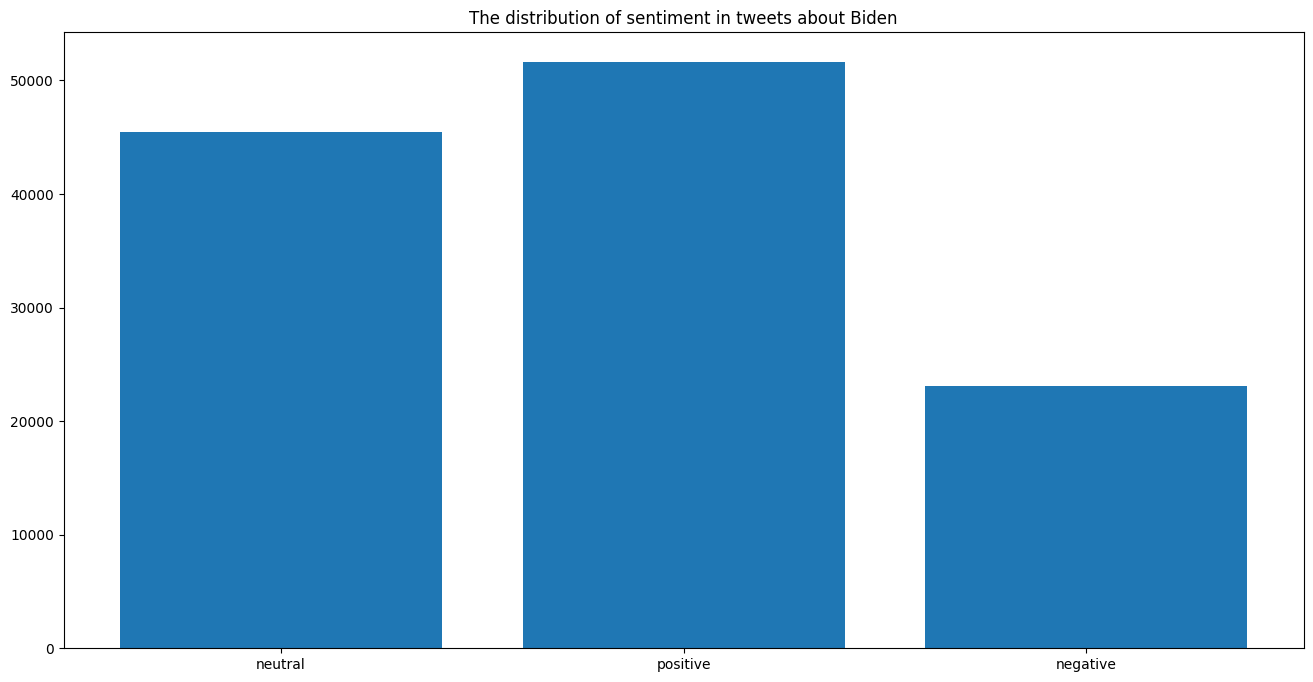

In [64]:
from collections import Counter

target_biden = Counter(tweets_biden_blob.analysis)

plt.figure(figsize=(16,8))
plt.bar(target_biden.keys(), target_biden.values())
plt.title("The distribution of sentiment in tweets about Biden")

Text(0.5, 1.0, 'The distribution of sentiment in tweets about Trump')

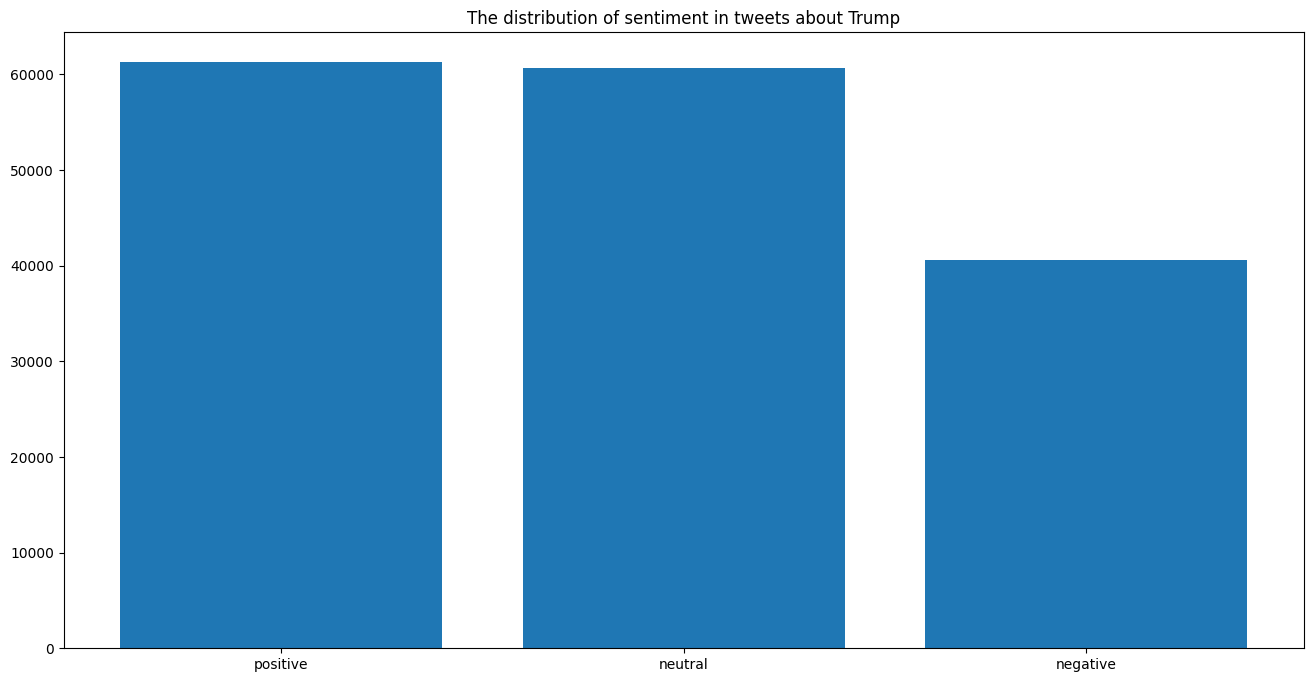

In [65]:
target_trump = Counter(tweets_trump_blob.analysis)

plt.figure(figsize=(16,8))
plt.bar(target_trump.keys(), target_trump.values())
plt.title("The distribution of sentiment in tweets about Trump")


In [66]:
import plotly.graph_objects as go

general  = tweets_biden_blob.groupby('analysis').analysis.count()
neutral  = tweets_biden_blob[tweets_biden_blob['analysis'] == 'neutral'].text_clean.count()
positive = tweets_biden_blob[tweets_biden_blob['analysis'] == 'positive'].text_clean.count()
negative = tweets_biden_blob[tweets_biden_blob['analysis'] == 'negative'].text_clean.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positive","negative","neutral"], values = [positive,negative,neutral])])
fig.update_layout(title_text = 'Sentiment Distribution Biden')
fig.show()

In [67]:
general  = tweets_trump_blob.groupby('analysis').analysis.count()
neutral  = tweets_trump_blob[tweets_trump_blob['analysis'] == 'neutral'].text_clean.count()
positive = tweets_trump_blob[tweets_trump_blob['analysis'] == 'positive'].text_clean.count()
negative = tweets_trump_blob[tweets_trump_blob['analysis'] == 'negative'].text_clean.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positive","negative","neutral"], values = [positive,negative,neutral])])
fig.update_layout(title_text = 'Sentiment Distribution Trump')
fig.show()